### Things to save (raw and transformed versions of each):
- X
- Y
- xlbls
- mean ARP by Xclass
- from PCA:
    - Xred
    - PCs
    - ARP(PCs)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# load data
cfl_path = '/Users/imanwahle/Desktop/cfl'
X = np.load(os.path.join(cfl_path, 'data/galaxies/X.npy'))
Y = np.load(os.path.join(cfl_path, 'data/galaxies/Y.npy'))
print('X shape: ', X.shape)
print('Y shape: ', Y.shape)

X shape:  (8643, 5202)
Y shape:  (8643, 6)


In [21]:
# # transform raw data here if desired

# # Xraw data should be arcsinhed and scaled 0-1
# X = np.arcsinh(X)
# X = X - X.min(axis=0)
# X = X / X.max(axis=0)

# # Yraw should be z-scored
# Y = Y - Y.mean(axis=0)
# Y = Y / Y.std(axis=0)

In [3]:
# make save dir
save_to = 'data_for_eric/raw'
# os.mkdir(save_to)

In [ ]:
np.save(os.path.join(save_to, 'X'), X)
np.save(os.path.join(save_to, 'Y'), Y)

In [4]:
xlbls = np.load('data_for_eric/xlbls.npy')
cluster_params = { 'n_Xclusters' : 4, 
                   'n_Yclusters' : 4 }

# ARPs By Class

Average of Input RAW image1 ARPs by Class. Blue = average.


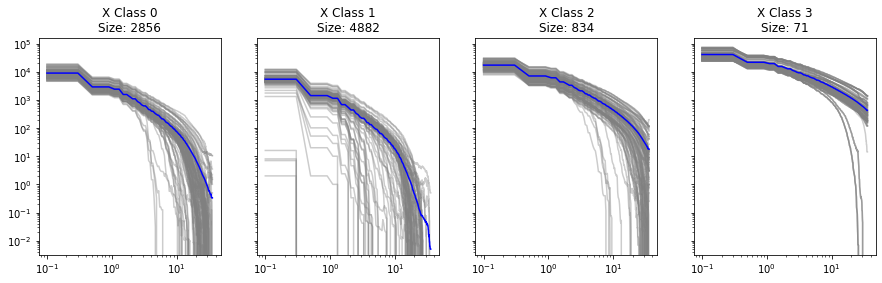

In [5]:
from galaxy_util import calculate_arp, reshape_input
print('Average of Input RAW image1 ARPs by Class. Blue = average.')
fig,ax = plt.subplots(1, cluster_params['n_Xclusters'], figsize=(15,4), sharex=True, sharey=True)
figmin = np.min(X[:,2601:])
figmax = np.max(X[:,2601:])
all_means = np.zeros((cluster_params['n_Xclusters'], 200))
for i in range(cluster_params['n_Xclusters']):
    class_idx = np.where(xlbls==i)[0]
    class_samples = np.random.choice(class_idx, 100)
    means = np.zeros((100,200))
    for j in range(100):
        r, mean = calculate_arp(reshape_input(X[class_samples[j]], im_no=1))
        means[j] = mean
        im = ax[i].loglog(r, mean, c='gray',alpha=0.4)
    ax[i].loglog(r, means.mean(axis=0), c='blue')
    all_means[i] = means.mean(axis=0)
    ax[i].set_title('X Class {}\nSize: {}'.format(i, np.sum(xlbls==i)))

plt.show()
np.save(os.path.join(save_to, 'arp_class_mean_image1'), all_means)

Average of Input RAW image0 ARPs by Class. Blue = average.


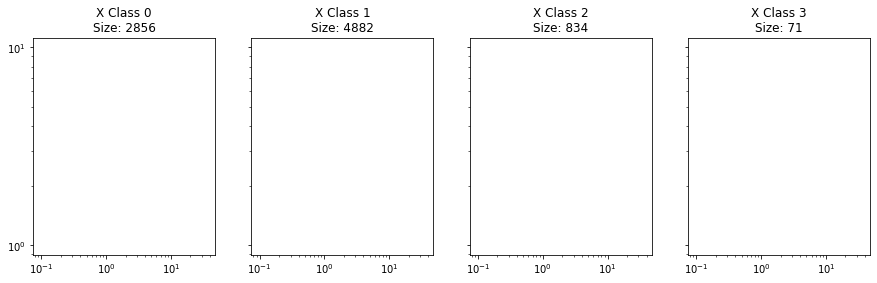

In [6]:
print('Average of Input RAW image0 ARPs by Class. Blue = average.')
fig,ax = plt.subplots(1, cluster_params['n_Xclusters'], figsize=(15,4), sharex=True, sharey=True)
figmin = np.min(X[:,:2601])
figmax = np.max(X[:,:2601])
all_means = np.zeros((cluster_params['n_Xclusters'], 200))
for i in range(cluster_params['n_Xclusters']):
    class_idx = np.where(xlbls==i)[0]
    class_samples = np.random.choice(class_idx, 100)
    means = np.zeros((100,200))
    for j in range(100):
        r, mean = calculate_arp(reshape_input(X[class_samples[j]], im_no=0))
        means[j] = mean
        im = ax[i].loglog(r, mean, c='gray',alpha=0.4)
    ax[i].loglog(r, means.mean(axis=0), c='blue')
    all_means[i] = means.mean(axis=0)
    ax[i].set_title('X Class {}\nSize: {}'.format(i, np.sum(xlbls==i)))

plt.show()
np.save(os.path.join(save_to, 'arp_class_mean_image0'), all_means)

# PCA

In [7]:
from sklearn.decomposition import PCA
# do PCA
pca = PCA(n_components=X.shape[1])
Xred = pca.fit_transform(X)

In [8]:
np.save(os.path.join(save_to, 'X_pca_proj'), Xred)
np.save(os.path.join(save_to, 'X_pca_components'), pca.components_)
for imgi in range(2):
    components_arp = np.zeros((pca.components_.shape[0], 200))
    for i in range(pca.components_.shape[0]):
        components_arp[i] = calculate_arp(reshape_input(pca.components_[i,:],im_no=imgi))[1]
    np.save(os.path.join(save_to, 'X_pca_components_arp_image{}'.format(imgi)), components_arp)
np.save(os.path.join(save_to, 'X_pca_proj'), Xred)


In [10]:
Xred.shape

(8643, 5202)

In [21]:
np.load(os.path.join(save_to, 'Y.npy')).shape

(8643, 6)